# My question is whether videos with fewer views have a greater like-to-view ratio.
# My alternative hypothesis will be that videos with fewer views will have a greater like-to-view ratio due to being niche and doing well with a limited audience.
# In addition, videos with more views attract bots, and since bots engage less with content, they would lower the like-to-view ratio of videos with more views.
# The null hypothesis will be that there is no difference in like-to-view ratio between videos with fewer and more views.
# The group of videos with "less views" will be those with less than 10,000 views, while "more views" will be greater than 10,000 views.

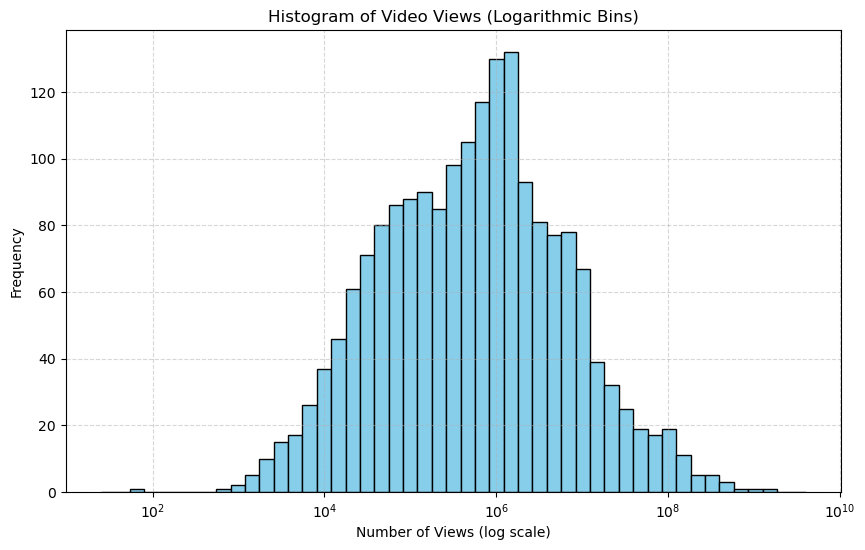

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("videos-stats.csv")

# Make sure the 'views' column exists
if 'Views' not in df.columns:
    raise ValueError("CSV must have a 'Views' column")

# Remove zeros or negative views (can't take log of these)
views = df['Views']
views = views[views > 0]

# Create logarithmic bins
bins = np.logspace(np.log10(views.min()), np.log10(views.max()), 50) # 50 bins logarithmically spaced

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(views, bins=bins, color='skyblue', edgecolor='black')

# Set x-axis to log scale
plt.xscale('log')

plt.title("Histogram of Video Views (Logarithmic Bins)")
plt.xlabel("Number of Views (log scale)")
plt.ylabel("Frequency")
plt.grid(True, which="both", linestyle="--", alpha=0.5)

plt.show()

In [16]:
def proportion_above_below(df, column, threshold):
    """
    Prints the proportion of values below and above a threshold.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the data
        column (str): The column name to check
        threshold (float): The threshold value
    """
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame")
    
    total = len(df)
    below = (df[column] < threshold).sum()
    above = (df[column] >= threshold).sum()
    
    print(f"Proportion below {threshold}: {below / total:.2%}")
    print(f"Proportion above {threshold}: {above / total:.2%}")


# Example usage:
df = pd.read_csv("videos-stats.csv")
proportion_above_below(df, "Views", 10000) # threshold 10,000 views

Proportion below 10000: 4.89%
Proportion above 10000: 95.00%


Average like-to-view ratio for videos <10,000 views: 0.05572726157651295
Average like-to-view ratio for videos >10,000 views: 0.03241828735044111


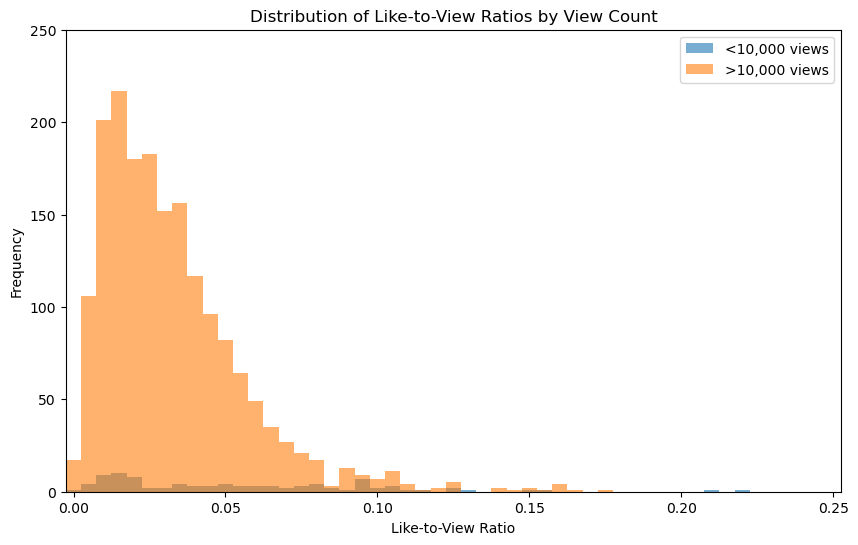

In [17]:
# Ensure Likes column exists
if 'Likes' not in df.columns:
    raise ValueError("CSV must have a 'Likes' column")

# Create two groups based on Views
low_views_df = df[df['Views'] < 10000].copy()
high_views_df = df[df['Views'] > 10000].copy()

# Calculate like-to-view ratio
low_views_df['Like_to_View_Ratio'] = low_views_df['Likes'] / low_views_df['Views']
high_views_df['Like_to_View_Ratio'] = high_views_df['Likes'] / high_views_df['Views']

# Compute average ratios
low_views_avg_ratio = low_views_df['Like_to_View_Ratio'].mean()
high_views_avg_ratio = high_views_df['Like_to_View_Ratio'].mean()

print(f"Average like-to-view ratio for videos <10,000 views: {low_views_avg_ratio}")
print(f"Average like-to-view ratio for videos >10,000 views: {high_views_avg_ratio}")

# Visualize the distributions
plt.figure(figsize=(10,6))
plt.hist(low_views_df['Like_to_View_Ratio'], bins=51, range=(-0.0025, 0.2525), alpha=0.6, label='<10,000 views')
plt.hist(high_views_df['Like_to_View_Ratio'], bins=51, range=(-0.0025, 0.2525), alpha=0.6, label='>10,000 views')
plt.xlabel("Like-to-View Ratio")
plt.ylabel("Frequency")
plt.title("Distribution of Like-to-View Ratios by View Count")
plt.xlim(-0.0025, 0.2525)
plt.ylim(0, 250)
plt.legend()
plt.show()

In [18]:
from scipy import stats

# Perform a two-sample t-test (independent samples, equal variance can be assumed)
t_stat, p_value = stats.ttest_ind(low_views_df['Like_to_View_Ratio'],
                                  high_views_df['Like_to_View_Ratio'],
                                  equal_var=True)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05  # significance level

if p_value < alpha:
    print("Reject the null hypothesis, the alternative hypothesis is supported.")
else:
    print("Fail to reject the null hypothesis.")

T-statistic: 8.618576742154417
P-value: 1.414255486223546e-17
Reject the null hypothesis, the alternative hypothesis is supported.


# In conclusion, my alternative hypothesis is extremely strongly supported. The p-value for the null hypothesis was ~1.41e-17, or around 1 in 7(10)^16.
# This is very nearly the exact same value as picking a specific 2-second window out of the entire history of the Earth if you had to guess.
# It is practically impossible that there is no relationship between number of views and like-to-view ratio.
# In addition, the mean ratios (0.0557 for less views, 0.0324 for more views) seem to support the theory that videos with less views have a higher like-to-view ratio.